# Going through whole Predictatop Pipeline Using the runner scripts for each step

### Predictatops is organized into steps of a data processing, model building, prediction pipeline. Each step can be run as a separate Python module or via a one line call to a runner script with sensible defaults and ordering of function calls.


### In this notebook, we're only using the runner scripts, <i>in other words, load_runner.py instead of load.py.</i>

<hr/>

First, it should be noted that Predictatops isn't on Pypy, so we're going to be loading the Python modules from a local directory and this notebook is running from the demo folder in the same Predictatops directory. If you run it from elsewhere, you'll have to change the paths. The lines below navigate to the right place and run using the default dataset from the McMurray Formation.

In [1]:
ls

Example_2_creating_facies_prediction_dataset_forRockhound_using_module_features.ipynb
Example_Every_Step_Via_HighLevel_Runner_Scripts_v1.ipynb
Example_creating_dataset_forRockhound_using_module_features_v1.ipynb
Example_firstSteps_modules_fetchdata_configuration_checkdata.ipynb
Example_junk_post_balance.ipynb
Example_module_all_runner_temp_v1b.ipynb
Example_module_balance_v1.ipynb
Example_module_predictionclasses_v1.ipynb
Example_module_trainclasses_v2.ipynb
Example_module_wellsKNN_v1.ipynb
README.md
current_errors_TopMcMr_20181006.png
mannville_demo_data/
mannville_demo_data.zip


In [2]:
cd ..

/Users/justingosses/Code/predictatops


In [3]:
cd predictatops/

/Users/justingosses/Code/predictatops/predictatops


In [4]:
ls

__init__.py                       load_runner.py
__pycache__/                      main.py
all_runner.py                     map.py
balance.py                        plot.py
balance_runner.py                 plot_runner.py
checkdata.py                      predictionclasses.py
checkdata_runner.py               predictionclasses_runner.py
cli.py                            registry.txt
configurationplusfiles.py         split.py
configurationplusfiles_runner.py  split_runner.py
dask-worker-space/                trainclasses.py
features.py                       trainclasses_runner.py
features_runner.py                wellsKNN.py
fetch_demo_data.py                wellsKNN_runner.py
load.py


<hr/>

Most of the imports are down in the scripts we'll be calling, but one that is require is system

In [ ]:
from os import system

<hr/>

#### WARNING:

Before you go on, please be away that this will generated a lot of new data saved in .h5 files, several GB work. A .h5 file is saved after each step.  If your computer is close to running out of memmory, it could fill it up. One option to avoid that is to delete each file saved from 2 steps back or to delete all the previous h5 files except for the one you're currently working on.

<hr/>

### First, we'll see if the default dataset is already imported and in our local directory for data as defined in the configuration

In [ ]:
from fetch_demo_data import *

### Next, we'll run the configurationplusfiles_runner.py file and establish configuration objects that we'll use later

In [5]:
from configurationplusfiles_runner import input_data_inst, config, output_data_inst


/Users/justingosses/anaconda/envs/predictatops/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/justingosses/anaconda/envs/predictatops/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


head of picks df =      SitID  HorID      Pick  Quality
0  102496   1000       321        1
1  102496   2000                 -1
2  102496   3000                 -1
3  102496   4000                 -1
4  102496   5000       438        2
making base folder for results in: ../results_higherBlanceAndLowerWindows_20190517
base_path directory already exists, ../results_higherBlanceAndLowerWindows_20190517  so not creating it again. This may or may not be what you intended, so just flagging it.
directory  checkData  already exists so not making it again in make_all_directories function of configurationplusfiles.py
directory  load  already exists so not making it again in make_all_directories function of configurationplusfiles.py
directory  split  already exists so not making it again in make_all_directories function of configurationplusfiles.py
directory  wellsKNN  already exists so not making it again in make_all_directories function of configurationplusfiles.py
directory  features  already 

### checkdata.py and checkdata_runner.py is used to see what well log curves and tops are available and limit the wells used to the ones that have the data we specify

In [ ]:
from checkdata_runner import checkdata_path_results

### Load.py & load_runner.py are used to load the data for the wells we found met our needs using checkdata.py

In [ ]:
import load_runner

### Split_runner.py is used to split the wells into training and test wells. We want to do this before we create any features to avoid leaking information from train into test

In [ ]:
import split_runner

### wellsKNN_runner.py finds the nearest neighbor wells for each well, finds the depth of the top we're trying to predict in the training wells adn then uses that to create some basic features

In [ ]:
import wellsKNN_runner

### features_runner.py creates the rest of our features

In [ ]:
import features_runner

### balance_runner.py rebalances the classes in the training dataset. Our classes we're made that we'll try to predict are very unbalanced. If we kept them as they are, we'd be good at predicting wihich depth points in each well are far away from the top but poor at predicting the actual top depth.

In [ ]:
import balance_runner

### trainclasses_runner. used scikit-learn and XGBoost to train a machine-learning model

In [ ]:
import trainclasses_runner

### predictionclasses_runner takes the model generated from the training dataset and uses it to make predictions for the test dataset. Those predictions are then evaluated to get a root mean square error (RMSE) and R2 value for the prediction.

the model imported is: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=nan, n_estimators=100,
       n_gpus=0, n_jobs=-1, nthread=None, num_class=5,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


/Users/justingosses/anaconda/envs/predictatops/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy of training dataset 0.845268885171085


/Users/justingosses/anaconda/envs/predictatops/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy of test dataset 0.9184066168540459
loaded model into object instance
 eventually there will some sort of help printed here to explain this function more and how it is envisioned you wil run it. In other words, step 1, step 2, etc.


/Users/justingosses/anaconda/envs/predictatops/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ran predict_from_model() which runs inside self.result_df_dist_class_prediction = model.predict(df_X_toPredict) access the results by appending .result_df_dist_class_prediction to the class instance
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
in concat_step2, type of df_results_trainOrtest_wIndex= <class 'pandas.core.frame.DataFrame'>
type(idx) <class 'pandas.core.frame.DataFrame'>
distClassDF_wRollingCols_training.head() =    class_DistFrPick_TopTarget TopTarget_Pick_pred class_DistFrPick_TopTarget  \
0                          0                   0                          0   
1                          0                   0                          0   
2                          0                   0                          0   
3                          0                   0                          0   
4                          0                   0                          0   

                   UWI trainOrTest  TopTarget_DEPTH     DEPT  \
0  00-10-32-080-20W4-0      

/Users/justingosses/anaconda/envs/predictatops/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ran predict_from_model() which runs inside self.result_df_dist_class_prediction = model.predict(df_X_toPredict) access the results by appending .result_df_dist_class_prediction to the class instance
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
in concat_step2, type of df_results_trainOrtest_wIndex= <class 'pandas.core.frame.DataFrame'>
type of dist_class_pred_df <class 'pandas.core.frame.DataFrame'>
type of self.df_results_trainOrtest_wIndex <class 'pandas.core.frame.DataFrame'>
type(idx) <class 'pandas.core.frame.DataFrame'>
distClassDF_wRollingCols_testData.head()   class_DistFrPick_TopTarget TopTarget_Pick_pred class_DistFrPick_TopTarget  \
0                          0                   0                          0   
1                          0                   0                          0   
2                          0                   0                          0   
3                          0                   0                          0   
4                          0 

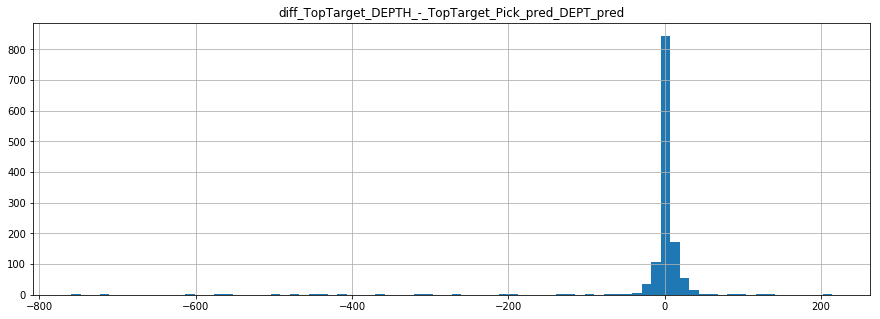

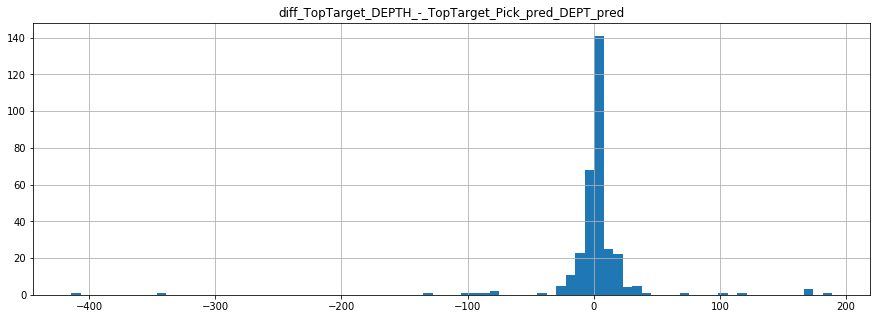

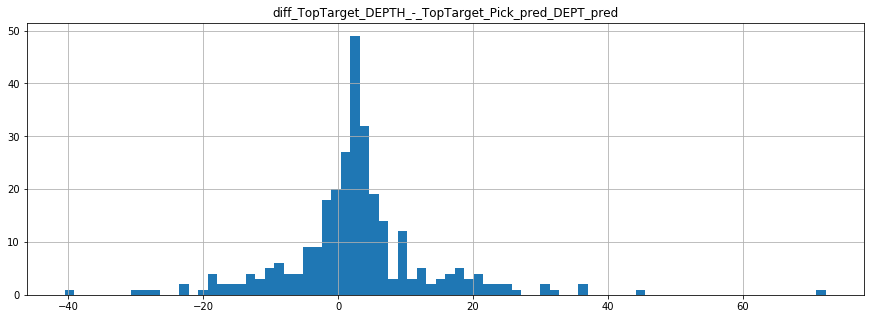

In [6]:
import predictionclasses_runner